In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import pprint
import json
import re
import os

df = pd.read_csv("indeed_data.csv")
indeed_df = df
# Output File (CSV)
output_data_file = "cleaned_indeed_jobs.csv"

In [27]:
import re
import numpy as np

In [28]:
indeed_df.drop("onmousedown", axis=1, inplace=True)
indeed_df.drop("indeedApply", axis=1, inplace=True)
indeed_df.drop("expired", axis=1, inplace=True)
indeed_df.drop("formattedLocationFull", axis=1, inplace=True)

In [29]:
unique_df = indeed_df.groupby(["formattedLocation"])["jobtitle"].count()


In [30]:
name_list = [unique_df.index[i].split(', ') for i in range(0, len(unique_df.index))]
name_list = [e[0] for e in name_list]
unique_df.index = name_list
unique_df = unique_df.to_frame()
unique_df = unique_df.reset_index()
unique_df.head()

,index,jobtitle
0,Ada,1
1,Adelphi,1
2,Albuquerque,2
3,Alexandria,3
4,Alpharetta,2


In [31]:
unique_df["index"].value_counts(ascending=False)

Newark          3
Wilmington      3
Portland        2
Oakland         2
Columbus        2
               ..
Coppell         1
Watertown       1
Dayton          1
Carmel          1
Falls Church    1
Name: index, Length: 342, dtype: int64

In [32]:
filename = os.path.join("..", "Cost_Of_Living_Output_Data", "COLI_new.csv")
df_COL = pd.read_csv(filename)
df_COL = df_COL.drop(['Unnamed: 0'], axis=1)
df_COL.count()

City                    9
Cost Of Living Index    9
dtype: int64

In [33]:
filename1 = os.path.join("..", "School population by city.csv")
df_student = pd.read_csv(filename1)
df_student = df_student.rename(columns={"Row Labels": "City"})

df_student["City"] =[df_student["City"][i].lstrip() for i in range(0, len(df_student["City"]))]

In [34]:
df_student.head()

,City,Sum of Student population
0,Miami,112915.0
1,New York,80709.0
2,Houston,79282.0
3,Los Angeles,72573.0
4,Athens,72216.0


In [35]:
df_col_student = pd.merge(df_COL, df_student, how="left", on="City")
df_col_student.head()

,City,Cost Of Living Index,Sum of Student population
0,New York,100.000000,80709.0
1,San Francisco,91.280893,29778.0
2,Washington,87.528224,4244.0
3,Seattle,85.556800,47400.0
4,Boston,82.666323,16164.0


In [36]:
df_col_student.columns

Index(['City', 'Cost Of Living Index', 'Sum of Student population'], dtype='object')

In [37]:
df_col_student_jobs = pd.merge(df_col_student, unique_df, how="left", left_on="City", right_on="index")

In [38]:
df_col_student_jobs.drop("index", axis=1, inplace=True)
df_col_student_jobs.rename(columns={"jobtitle": "No.of Jobs"}, inplace=True)

In [39]:
filename3 = os.path.join("..", "COLI w average salary.csv")
df_salary = pd.read_csv(filename3)

df_salary["City"] = [df_salary["City"][i].split(', ')[0] for i in range(0, len(df_salary["City"]))]
df_salary.head()
df_col_student_jobs_salary = pd.merge(df_col_student_jobs, df_salary, how="left", left_on="City", right_on="City")
df_col_student_jobs_salary

,City,Cost Of Living Index_x,Sum of Student population,No.of Jobs,Rank,City ID,Country,Cost Of Living Index_y,Purchasing Power,Data Science Average Salary,...,Data Analysts High,Average Pay vs National Avg.1,Data Engineer Average Salary,Data Engineer Low,Data Engineer High,Average Pay vs National Avg.2,Data Architect Average Salary,Data Architect Low,Data Architect High,Average Pay vs National Avg.3
0,New York,100.000000,80709.0,52,1,3455,United States,100.000000,100.000000,"$95,342.00",...,"$77,000.00",7%,"$93,392.00","$69,000.00","$132,000.00",7%,"$88,150.00","$66,000.00","$114,000.00",6%
1,San Francisco,91.280893,29778.0,29,2,3483,United States,91.466340,136.044823,"$119,907.00",...,"$95,000.00",33%,"$107,660.00","$81,000.00","$149,000.00",24%,"$101,802.00","$77,000.00","$130,000.00",23%
2,Washington,87.528224,4244.0,17,6,3497,United States,87.678570,130.295852,"$87,176.00",...,"$79,000.00",10%,"$92,363.00","$69,000.00","$132,000.00",6%,"$91,735.00","$70,000.00","$118,000.00",11%
3,Seattle,85.556800,47400.0,27,8,3487,United States,85.630842,133.483025,"$106,358.00",...,"$76,000.00",6%,"$87,612.00","$66,000.00","$124,000.00",1%,"$88,133.00","$67,000.00","$114,000.00",6%
4,Boston,82.666323,16164.0,21,9,3400,United States,82.799507,112.477323,"$93,032.00",...,"$76,000.00",5%,"$82,256.00","$61,000.00","$118,000.00",-5%,"$86,720.00","$66,000.00","$112,000.00",5%
5,Chicago,79.986539,42750.0,21,11,3405,United States,80.125871,111.903520,"$86,460.00",...,"$70,000.00",-3%,"$79,689.00","$59,000.00",$115.00,-8%,"$88,069.00","$67,000.00","$113,000.00",6%
6,Atlanta,73.683302,67039.0,17,27,3391,United States,73.723803,140.655508,"$85,323.00",...,"$67,000.00",-6%,"$73,514.00","$54,000.00","$106,000.00",-16%,"$82,414.00","$62,000.00","$107,000.00",-1%
7,Charlotte,72.222532,29710.0,20,31,3403,United States,72.348339,144.345781,"$81,785.00",...,"$69,000.00",-4%,"$67,800.00","$50,000.00","$98,000.00",-22%,"$77,845.00","$59,000.00","$101,000.00",-6%
8,Austin,67.638412,51832.0,20,41,3393,United States,67.499437,146.489099,"$89,100.00",...,"$70,000.00",-2%,"$77,450.00","$57,000.00","$111,000.00",-11%,"$85,756.00","$65,000.00","$110,000.00",4%


In [40]:
df_indeed_salary = pd.DataFrame({"Avg Salary Indeed": \
                                 [141520.00, 161743.00, 123915.00, 180106.00, 118409.00, 115912.00, 114744.00, 114054.00, 114853.00, 126646],\
                                "City": ["New York", "San Francisco", "Seattle", "Mountain View", "Boston","Chicago", "Austin", "Charlotte", "Washington", "Atlanta"]
                                })

In [49]:
df_col_student_jobs_salary_final = pd.merge(df_col_student_jobs_salary, df_indeed_salary, how="left", left_on="City", right_on="City")


In [50]:
df_col_student_jobs_salary_final.drop("Rank",axis=1, inplace=True)
df_col_student_jobs_salary_final.drop("City ID",axis=1, inplace=True)
df_col_student_jobs_salary_final.drop("Country",axis=1, inplace=True)
df_col_student_jobs_salary_final.drop("Cost Of Living Index_y",axis=1, inplace=True)
df_col_student_jobs_salary_final.drop("Purchasing Power",axis=1, inplace=True)
#df_col_student_jobs_salary_final.drop("City ID",axis=1, inplace=True)
#df_col_student_jobs_salary_final.drop("Country",axis=1, inplace=True)
#df_col_student_jobs_salary_final.drop("Cost Of Living Index_y",axis=1, inplace=True)
df_col_student_jobs_salary_final.rename(columns={"Cost Of Living Index_x": "Cost Of Living Index"}, inplace=True)

In [51]:
col = df_col_student_jobs_salary_final.columns
col

Index(['City', 'Cost Of Living Index', 'Sum of Student population',
       'No.of Jobs', 'Data Science Average Salary', 'Data Scientist Low',
       'Data Scientist High', 'Average Pay vs National Avg',
       'Data Analyst Average Salary', 'Data Analyst Low', 'Data Analysts High',
       'Average Pay vs National Avg.1', 'Data Engineer Average Salary',
       'Data Engineer Low', 'Data Engineer High',
       'Average Pay vs National Avg.2', 'Data Architect Average Salary',
       'Data Architect Low', 'Data Architect High',
       'Average Pay vs National Avg.3', 'Avg Salary Indeed'],
      dtype='object')

In [52]:
df_col_student_jobs_salary_final = df_col_student_jobs_salary_final[['City', 'No.of Jobs', 'Avg Salary Indeed','Cost Of Living Index', 'Sum of Student population',
        'Data Science Average Salary', 'Data Scientist Low',
       'Data Scientist High', 'Average Pay vs National Avg',
       'Data Analyst Average Salary', 'Data Analyst Low', 'Data Analysts High',
       'Average Pay vs National Avg.1', 'Data Engineer Average Salary',
       'Data Engineer Low', 'Data Engineer High',
       'Average Pay vs National Avg.2', 'Data Architect Average Salary',
       'Data Architect Low', 'Data Architect High',
       'Average Pay vs National Avg.3']]
df_col_student_jobs_salary_final

,City,No.of Jobs,Avg Salary Indeed,Cost Of Living Index,Sum of Student population,Data Science Average Salary,Data Scientist Low,Data Scientist High,Average Pay vs National Avg,Data Analyst Average Salary,...,Data Analysts High,Average Pay vs National Avg.1,Data Engineer Average Salary,Data Engineer Low,Data Engineer High,Average Pay vs National Avg.2,Data Architect Average Salary,Data Architect Low,Data Architect High,Average Pay vs National Avg.3
0,New York,52,141520.0,100.000000,80709.0,"$95,342.00","$73,000.00","$125,000.00",0%,"$56,071.00",...,"$77,000.00",7%,"$93,392.00","$69,000.00","$132,000.00",7%,"$88,150.00","$66,000.00","$114,000.00",6%
1,San Francisco,29,161743.0,91.280893,29778.0,"$119,907.00","$93,000.00","$154,000.00",26%,"$70,015.00",...,"$95,000.00",33%,"$107,660.00","$81,000.00","$149,000.00",24%,"$101,802.00","$77,000.00","$130,000.00",23%
2,Washington,17,114853.0,87.528224,4244.0,"$87,176.00","$67,000.00","$114,000.00",-9%,"$57,579.00",...,"$79,000.00",10%,"$92,363.00","$69,000.00","$132,000.00",6%,"$91,735.00","$70,000.00","$118,000.00",11%
3,Seattle,27,123915.0,85.556800,47400.0,"$106,358.00","$83,000.00","$137,000.00",11%,"$55,797.00",...,"$76,000.00",6%,"$87,612.00","$66,000.00","$124,000.00",1%,"$88,133.00","$67,000.00","$114,000.00",6%
4,Boston,21,118409.0,82.666323,16164.0,"$93,032.00","$71,000.00","$121,000.00",-3%,"$55,451.00",...,"$76,000.00",5%,"$82,256.00","$61,000.00","$118,000.00",-5%,"$86,720.00","$66,000.00","$112,000.00",5%
5,Chicago,21,115912.0,79.986539,42750.0,"$86,460.00","$66,000.00","$113,000.00",-10%,"$51,065.00",...,"$70,000.00",-3%,"$79,689.00","$59,000.00",$115.00,-8%,"$88,069.00","$67,000.00","$113,000.00",6%
6,Atlanta,17,126646.0,73.683302,67039.0,"$85,323.00","$66,000.00","$112,000.00",-11%,"$49,270.00",...,"$67,000.00",-6%,"$73,514.00","$54,000.00","$106,000.00",-16%,"$82,414.00","$62,000.00","$107,000.00",-1%
7,Charlotte,20,114054.0,72.222532,29710.0,"$81,785.00","$63,000.00","$107,000.00",-14%,"$50,281.00",...,"$69,000.00",-4%,"$67,800.00","$50,000.00","$98,000.00",-22%,"$77,845.00","$59,000.00","$101,000.00",-6%
8,Austin,20,114744.0,67.638412,51832.0,"$89,100.00","$69,000.00","$117,000.00",-7%,"$51,484.00",...,"$70,000.00",-2%,"$77,450.00","$57,000.00","$111,000.00",-11%,"$85,756.00","$65,000.00","$110,000.00",4%


,Bachelor's,Master's,Phd
Count,77,42,9


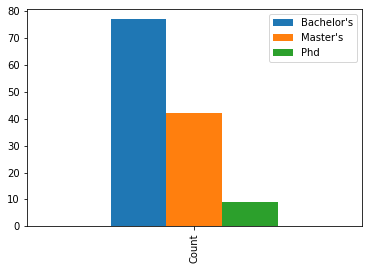

In [53]:
def has_bachelor(s):
    return (
        bool(re.search(r"bachelors?'?s?", s, re.IGNORECASE)) or
        bool(re.search(r"\sB\.?A\.?\s", s, re.IGNORECASE)) or
        bool(re.search(r"\sB\.?S\.?\s", s, re.IGNORECASE))
    )
def has_masters(s):
    return (
        bool(re.search(r"masters?'?s?\s", s, re.IGNORECASE)) or
        bool(re.search(r"\sM\.?A\.?\s", s, re.IGNORECASE)) or
        bool(re.search(r"\sM\.?S\.?\s", s, re.IGNORECASE)) or
        bool(re.search(r"M\.?B\.?A\.?\s", s, re.IGNORECASE))
    )
def has_phd(s):
    return(
        (bool(re.search(r"Ph\.?d", s, re.IGNORECASE))) 
    )
education_df = pd.DataFrame({
    "Bachelor's": indeed_df["snippet"].apply(has_bachelor).value_counts(())[1],
    "Master's": indeed_df["snippet"].apply(has_masters).value_counts(())[1],
    "Phd": indeed_df["snippet"].apply(has_phd).value_counts(())[1],
},index=["Count"])
education_df.plot(kind='bar')
education_df

In [249]:
def extract_years_only(s):
    results = re.findall(r"([0-9]*)\+?.[yY]ear.*", s)
    if results and results[0]:
        return int(results[0])
    else:
        return np.nan

In [250]:
years = df["snippet"].apply(lambda s: extract_years_only(s))
df_years=pd.DataFrame(years.value_counts().sort_index())

In [251]:
df_years=df_years.rename(columns={"snippet":"No. of jobs"})
df_years.index.name ="Required No.of Years of Experience"
df_years

,No. of jobs
Required No.of Years of Experience,
1.0,5
2.0,12
3.0,18
4.0,7
5.0,23
6.0,2
7.0,8
8.0,5
10.0,13


In [253]:
def extract_tech_count(s, tech):
    result_count = re.findall(tech, s)

    if result_count:
        return len(result_count)
    else:
        return np.nan

In [254]:
df_tech = pd.DataFrame(columns={"Tech", "No.ofJobs"})
tech_list = ["Python"," R ","SQL","Tableau", "RegEx", "AWS", "Hadoop", "Spark", "Machine Learning", "AI"]

sample = df["snippet"]

for tech in tech_list:
    count =0
    job_tech = sample.apply(lambda s: extract_tech_count(s, tech))
  
    for i in range(0, len(job_tech)):
   
        if(pd.notna(job_tech[i])):
            count += 1
        else:
            continue
    tech_list_count = pd.DataFrame({"Tech":[tech], "No.ofJobs":[count]})
    df_tech = df_tech.append(tech_list_count)

df_tech.set_index("Tech")

,No.ofJobs
Tech,
Python,23
R,5
SQL,22
Tableau,9
RegEx,0
AWS,5
Hadoop,5
Spark,5
Machine Learning,16
